# Overview

## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?

- ave_lat change depending on service provider (boolean)

- **H0**: there is no change in ave_latency with a change in service provider

- **H1**: there is a change in ave_latency with a change in service provider

- **True Positive**: Reject H0 when ave_latency went up with change in service provider

- **True Negative**: Fail to reject H0 when ave_latency has not changed

- **Type 1 Error (False Positive)**: We reject H0 when the change in service provider has not caused an increase in ave_latency

- **Type 2 Error (False Negative)**: We fail to reject H0 when the change in service provider has caused an increase in ave_latency


### Is the website redesign any good?

- Did user_satisfaction (value) change with the website redesign (boolean)

- **H0**: There is no change in user_satisfaction with a change in website redesign

- **H1**: There is an increase in user_satisfaction with a change in website redesign

- **True Positive**: Reject H0 when user_satisfaction changed with the website redesign

- **True Negative**: Fail to reject H0 when there is no change in user_satisfaction with a change in website design

- **Type 1 Error (False Positive)**: We reject H0 when a change in website redesign has not caused an increase in user_satisfaction

- **Type 2 Error (False Negative)**: We fail to reject H0 when a change in website design has caused an increase in user_satisfaction


### Is our television ad driving more sales?

- Is there a positive change in sales since (value) since launching our television ad (boolean)

- **H0**: There is no change in sales since launching our ad

- **H1**: There is an increase in sales since launching our ad

- **True Positive**: Reject H0 when there is a positive change in sales after launching our ad

- **True Negative**: Fail to reject H0 when there is no positive change in sales after launching our ad

- **Type 1 Error (False Positive)**: We reject H0 when our ad has caused a positive change in sales

- **Type 2 Error (False Negative)**: We fail to reject H0 when our ad has not caused a positive change in sales


# Comparison of Groups

## Run a hypothesis test

1. Form hypothesis and set confidence interval 
    - $H_0$ is always that there is no association between the groups (they are independent)
    - $H_a$ is that there is a association (they are not independent) between the groups
2. Calculate appropriate test statistic and p-value
    - Make a contigency table of counts
    - Use stats.chi2_contingency
3. Conclude based on above values

## Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	49      	20

Doesn't Use A Macbook	1       	30

In [22]:
import pandas as pd
import numpy as np

from pydataset import data

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import env

- $H_0$
- $H_a$

### Hypothesis

- $H_0$: Whether or not someone is a codeup student does not affect whether or not they use a macbook
- $H_a$: Whether or not someone is a codeup student does affect whether or not they use a macbook

### Set our alpha

In [12]:
alpha = 0.05

### 2. Calculate appropriate test statistic and p-value

#### Make a contigency table of counts

In [13]:
data = {'codeup_student':  [49, 1],
        'not_codeup_student': [20, 30]
        }

df = pd.DataFrame(data)

In [14]:
df = pd.DataFrame(data, index=['Macbook', 'No_Macbook'])

In [15]:
observed = df
observed

,codeup_student,not_codeup_student
Macbook,49,20
No_Macbook,1,30


In [16]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=36.65264142122487, pvalue=1.4116760526193828e-09, dof=1, expected_freq=array([[34.5, 34.5],
       [15.5, 15.5]]))

In [17]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [18]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 0.0000


### 3. Conclude based on above values

In [19]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


#### There is a relationship between whether or not someone uses a macbook and whether or not they are a codeup student

## Choose another 2 categorical variables from the mpg dataset.

- State your null and alternative hypotheses.
- State your alpha.
- Perform a chi2 test of independence
- State your conclusion

In [23]:
mpg_df = data('mpg')
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [24]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [25]:
mpg_df.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [26]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [27]:
mpg_df.year.value_counts()

year
1999    117
2008    117
Name: count, dtype: int64

In [28]:
mpg_df.trans.value_counts()

trans
auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: count, dtype: int64

In [29]:
mpg_df.manufacturer.value_counts()

manufacturer
dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: count, dtype: int64

- $H_0$: There is no relationship between year manufactured and transmission
- $H_a$:There is a relationship between year manufactured and transmission

In [30]:
alpha = 0.05

In [31]:
observed = pd.crosstab(mpg_df.trans,mpg_df.year) 
observed

year,1999,2008
trans,,
auto(av),0,5
auto(l3),2,0
auto(l4),62,21
auto(l5),10,29
auto(l6),0,6
auto(s4),0,3
auto(s5),0,3
auto(s6),0,16
manual(m5),42,16


In [32]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=91.37512103418561, pvalue=8.621724230835161e-16, dof=9, expected_freq=array([[ 2.5,  2.5],
       [ 1. ,  1. ],
       [41.5, 41.5],
       [19.5, 19.5],
       [ 3. ,  3. ],
       [ 1.5,  1.5],
       [ 1.5,  1.5],
       [ 8. ,  8. ],
       [29. , 29. ],
       [ 9.5,  9.5]]))

In [33]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [34]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 0  5]
 [ 2  0]
 [62 21]
 [10 29]
 [ 0  6]
 [ 0  3]
 [ 0  3]
 [ 0 16]
 [42 16]
 [ 1 18]]

Expected
[[ 2  2]
 [ 1  1]
 [41 41]
 [19 19]
 [ 3  3]
 [ 1  1]
 [ 1  1]
 [ 8  8]
 [29 29]
 [ 9  9]]

----
chi^2 = 91.3751
p     = 0.0000


#### 3. Conclude based on above values

In [35]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


#### There is a relationship between the year manufactured and the transmission type

## Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [36]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [37]:
query = '''select dept_no, gender
FROM employees
join dept_emp
using (emp_no)
WHERE dept_emp.to_date > now() and dept_emp.dept_no IN ('d007','d001')
;
'''

emp_df = pd.read_sql(query, url)
emp_df

,dept_no,gender
0,d007,F
1,d007,M
2,d001,F
3,d007,F
4,d007,M
...,...,...
52538,d007,M
52539,d007,M
52540,d007,F
52541,d007,F


- $H_0$: An employees gender does not affect whether an employee works in sales or marketing
- $H_a$: An employees gender affects whether an employee works in sales or marketing

In [38]:
alpha = 0.05

In [39]:
emp_df.dept_no.value_counts()

dept_no
d007    37701
d001    14842
Name: count, dtype: int64

In [40]:
emp_df.gender.value_counts()

gender
M    31680
F    20863
Name: count, dtype: int64

In [41]:
observed_emp = pd.crosstab(emp_df.dept_no, emp_df.gender)
observed_emp

gender,F,M
dept_no,,
d001,5864,8978
d007,14999,22702


In [42]:
stats.chi2_contingency(observed_emp)

Chi2ContingencyResult(statistic=0.3240332004060638, pvalue=0.5691938610810126, dof=1, expected_freq=array([[ 5893.2426013,  8948.7573987],
       [14969.7573987, 22731.2426013]]))

In [43]:
chi2, p, dof, expected = stats.chi2_contingency(observed_emp)

In [44]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 0  5]
 [ 2  0]
 [62 21]
 [10 29]
 [ 0  6]
 [ 0  3]
 [ 0  3]
 [ 0 16]
 [42 16]
 [ 1 18]]

Expected
[[ 5893  8948]
 [14969 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [45]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

fail to reject the null hypothesis


#### There is not a relationship between gender and whether or not they work in sales or marketing

In [46]:
query = '''select employees.emp_no as emp, dept_manager.emp_no as manager, gender
FROM employees
left join dept_manager
using (emp_no)
;
'''

emp_df2 = pd.read_sql(query, url)
emp_df2

,emp,manager,gender
0,10001,NaN,M
1,10002,NaN,F
2,10003,NaN,M
3,10004,NaN,M
4,10005,NaN,M
...,...,...,...
300019,499995,NaN,F
300020,499996,NaN,M
300021,499997,NaN,M
300022,499998,NaN,M


In [47]:
emp_df2.emp.value_counts()

emp
10001     1
299980    1
299996    1
299995    1
299994    1
         ..
110344    1
110303    1
110228    1
110183    1
499999    1
Name: count, Length: 300024, dtype: int64

In [48]:
emp_df2['is_manager'] = emp_df2['manager'].notnull().astype(int)
emp_df2['is_manager'] = emp_df2['is_manager'].replace({0: 'No', 1: 'Yes'})

observed = pd.crosstab(emp_df2.gender, emp_df2.is_manager)
observed

is_manager,No,Yes
gender,,
F,120038,13
M,179962,11


In [49]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=1.4566857643547197, pvalue=0.22745818732810363, dof=1, expected_freq=array([[1.20041397e+05, 9.60331174e+00],
       [1.79958603e+05, 1.43966883e+01]]))

In [50]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [51]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[120038     13]
 [179962     11]]

Expected
[[120041      9]
 [179958     14]]

----
chi^2 = 1.4567
p     = 0.2275


#### 3. Conclude based on above values

In [52]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

fail to reject the null hypothesis


#### There is not a relationship between gender and whether or not someone is a manger

# Correlation

## Answer with the type of stats test you would use (assume normal distribution):

#### Is there a relationship between the length of your arm and the length of your foot?

Cont and Cont - Correlation Test

#### Does smoking affect when or not someone has lung cancer?

Cat and Cat - Proportion Test

#### Is gender independent of a person’s blood type?

Cat and Cat - Proportion Test

#### Does whether or not a person has a cat or dog affect whether they live in an apartment?

Cat and Cat - Proportion Test

#### Does the length of time of the lecture correlate with a student's grade?

Cont and Cont - Correlation Test

## Use the telco_churn data

In [53]:
import numpy as np
import pandas as pd

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#we love stats! 
from scipy import stats

In [54]:
query = '''
SELECT *
FROM customers;
'''
url = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'
telco_df = pd.read_sql(query, url)
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [55]:
telco_df.tenure.value_counts().head()

tenure
1     613
72    362
2     238
3     200
4     176
Name: count, dtype: int64

In [56]:
telco_df.monthly_charges.value_counts().head()

monthly_charges
20.05    61
19.85    45
19.95    44
19.90    44
20.00    43
Name: count, dtype: int64

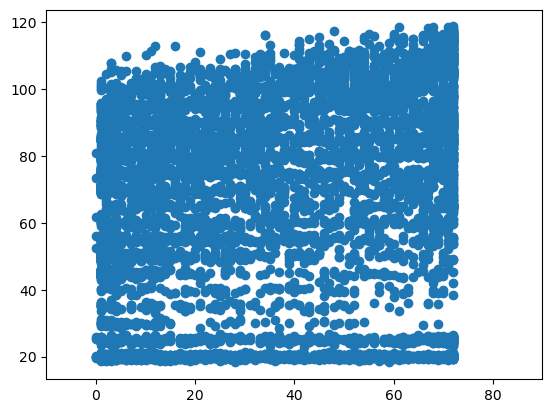

In [57]:
plt.scatter(telco_df.tenure, telco_df.monthly_charges)
plt.xlim(-10,90)
plt.show()

In [58]:
alpha = 0.05

### Does tenure correlate with monthly charges?

- $H_0$: Tenure does not have a linear correlation with monthly charges
- $H_a$: Tenure has a linear correlation with monthly charges

In [59]:
stats.pearsonr(telco_df.tenure, telco_df.monthly_charges)

PearsonRResult(statistic=0.24789985628615246, pvalue=4.094044991476844e-99)

In [60]:
r, p = stats.pearsonr(telco_df.tenure, telco_df.monthly_charges)

In [61]:
r

0.24789985628615246

In [62]:
p

4.094044991476844e-99

In [63]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


#### Tenure has a linear correlation with monthly charges

### Total charges?

- $H_0$: Tenure does not have a linear correlation with total charges
- $H_a$: Tenure has a linear correlation with total charges

In [64]:
telco_df.total_charges.sort_values()

2855          
3118          
3052          
5433          
1731          
         ...  
5868    997.75
4298     998.1
4173    999.45
3162     999.8
6421     999.9
Name: total_charges, Length: 7043, dtype: object

In [65]:
telco_df['total_charges'] = telco_df['total_charges'].str.replace(' ','').str.replace(',','')

In [66]:
telco_df['total_charges'] = pd.to_numeric(telco_df['total_charges'], errors='coerce')

In [67]:
telco_df.total_charges

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

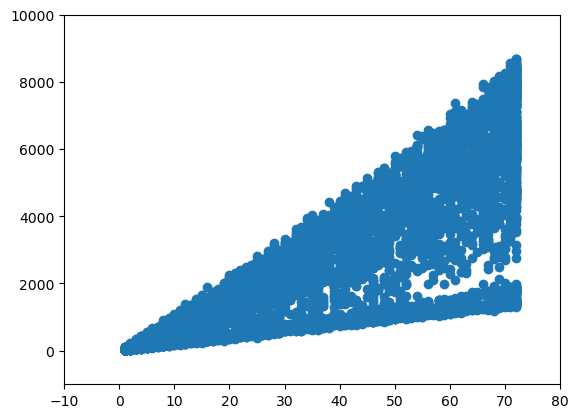

In [68]:
plt.scatter(telco_df.tenure, telco_df.total_charges)
plt.ylim(-1000,10_000)
plt.xlim(-10,80)
plt.show()

In [69]:
np.isnan(telco_df.total_charges).any()

True

In [70]:
np.isinf(telco_df.total_charges).any()

False

In [71]:
np.nan_to_num(telco_df.total_charges)

array([ 593.3 ,  542.4 ,  280.85, ...,   92.75, 4627.65, 3707.6 ])

In [72]:
telco_df['total_charges'] = np.nan_to_num(telco_df.total_charges)

In [73]:
telco_df['total_charges']

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [74]:
stats.pearsonr(telco_df.tenure, telco_df.total_charges)

PearsonRResult(statistic=0.8261783979502481, pvalue=0.0)

In [75]:
r, p = stats.pearsonr(telco_df.tenure, telco_df.total_charges)

In [76]:
r

0.8261783979502481

In [77]:
p

0.0

In [78]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


#### Tenure has a linear correlation with total charges

### What happens if you control for phone and internet service?

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

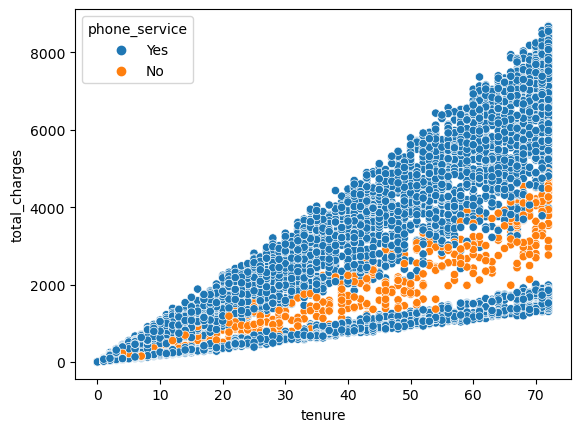

In [79]:
sns.scatterplot(data=telco_df, x='tenure', y='total_charges', hue='phone_service')
plt.show()

In [80]:
phonies = telco_df[telco_df.phone_service == 'Yes']
phonies.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


In [81]:
r, p = stats.pearsonr(phonies.tenure, phonies.total_charges)

In [82]:
r

0.8301076972900466

In [83]:
p

0.0

In [84]:
no_phonies = telco_df[telco_df.phone_service == 'No']
no_phonies.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
10,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,No,Yes,Yes,No,3,No,4,45.20,2460.55,No
14,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,Yes,Yes,No,No,3,No,3,45.05,2560.10,No
16,0020-JDNXP,Female,0,Yes,Yes,34,No,No phone service,1,Yes,...,Yes,Yes,Yes,Yes,2,No,2,61.25,1993.20,No
19,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,No,No,No,No,1,Yes,1,25.10,25.10,Yes
25,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,No,No,No,No,1,No,3,30.50,30.50,Yes


In [85]:
r, p = stats.pearsonr(no_phonies.tenure, no_phonies.total_charges)

In [86]:
r

0.9535697728407466

In [87]:
p

0.0

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


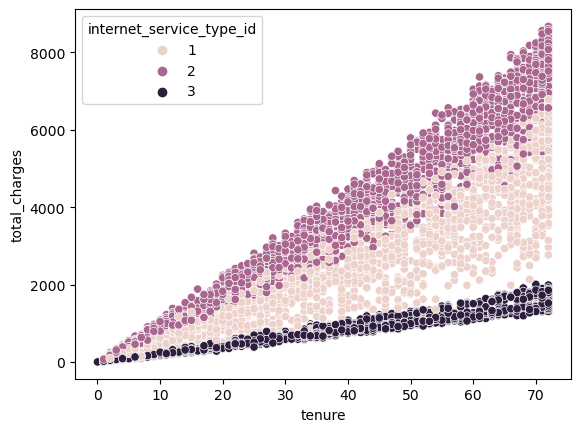

In [88]:
sns.scatterplot(data=telco_df, x='tenure', y='total_charges', hue='internet_service_type_id')
plt.show()

In [89]:
istype1 = telco_df[telco_df.internet_service_type_id == 1]
istype1.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.40,No
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,No,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No
8,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,No,No,1,Yes,1,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,Yes,Yes,3,Yes,2,90.45,5957.90,No


In [90]:
istype2 = telco_df[telco_df.internet_service_type_id == 2]
istype2.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.40,Yes
6,0013-SMEOE,Female,1,Yes,No,71,Yes,No,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,3,109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,63,Yes,Yes,2,Yes,...,No,Yes,No,No,3,Yes,4,84.65,5377.80,No


In [91]:
istype3 = telco_df[telco_df.internet_service_type_id == 3]
istype3.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
20,0023-UYUPN,Female,1,Yes,No,50,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,1,25.20,1306.30,No
23,0030-FNXPP,Female,0,No,No,3,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,2,19.85,57.20,No
24,0031-PVLZI,Female,0,Yes,Yes,4,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,2,20.35,76.35,Yes
27,0040-HALCW,Male,0,Yes,Yes,54,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,4,20.40,1090.60,No
28,0042-JVWOJ,Male,0,No,No,26,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,Yes,3,19.60,471.85,No


In [92]:
stats.pearsonr(istype1.tenure, istype1.total_charges)

PearsonRResult(statistic=0.9413276892816262, pvalue=0.0)

In [93]:
r, p = stats.pearsonr(istype1.tenure, istype1.total_charges)

In [94]:
r

0.9413276892816262

In [95]:
p

0.0

In [96]:
stats.pearsonr(istype2.tenure, istype2.total_charges)

PearsonRResult(statistic=0.9853093528070621, pvalue=0.0)

In [97]:
r, p = stats.pearsonr(istype2.tenure, istype2.total_charges)

In [98]:
r

0.9853093528070621

In [99]:
p

0.0

In [100]:
stats.pearsonr(istype3.tenure, istype3.total_charges)

PearsonRResult(statistic=0.9815669784401064, pvalue=0.0)

In [101]:
r, p = stats.pearsonr(istype3.tenure, istype3.total_charges)

In [102]:
r

0.9815669784401064

In [103]:
p

0.0

## Use the employees database.

#### Is there a relationship between how long an employee has been with the company and their salary?

In [ ]:
from env import host, user, password

In [ ]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [ ]:
query = '''select * from employees
join salaries
using (emp_no)
where to_date > now();
'''

In [125]:
df.shape

(240124, 9)

In [123]:
df = pd.read_sql(query, url)
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [126]:
df['tenure_days'] = df.to_date - df.hire_date

In [127]:
df.to_date - df.hire_date

0         2926512 days, 0:00:00
1         2926729 days, 0:00:00
2         2926449 days, 0:00:00
3         2926354 days, 0:00:00
4         2925338 days, 0:00:00
                  ...          
240119    2924120 days, 0:00:00
240120    2924958 days, 0:00:00
240121    2926578 days, 0:00:00
240122    2923846 days, 0:00:00
240123    2922337 days, 0:00:00
Length: 240124, dtype: object

In [128]:
df.tenure_days = df.tenure_days.astype('str').str.split(expand=True)[0]

In [129]:
df.tenure_days

0         2926512
1         2926729
2         2926449
3         2926354
4         2925338
           ...   
240119    2924120
240120    2924958
240121    2926578
240122    2923846
240123    2922337
Name: tenure_days, Length: 240124, dtype: object

In [130]:
df.tenure_days = df.tenure_days.astype(int)

In [131]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,2926512
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,2926729
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,2926449
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,2926354
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,2925338


$H_o$: There is no linear relationship between tenure and salary

$H_a$: There is a linear relationship between tenure and salary

alpha = 0.05

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='tenure_days', ylabel='salary'>

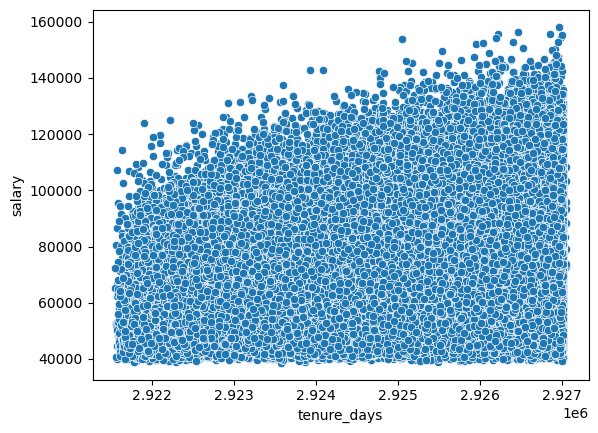

In [132]:
sns.scatterplot(data=df, x='tenure_days', y='salary')

In [133]:
r, p = stats.pearsonr(df.tenure_days, df.salary)

In [134]:
r

0.30646256131860095

In [135]:
p

0.0

The p-value is than alpha, so we reject the null hypothesis. 

We can conclude there is a weak linear relationship between an employees salary and their tenure.

#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [136]:
query = '''
select emp_no, count(title) as title_cnt
, datediff(max(to_date), hire_date) as tenure_days
from employees
	join titles
		using (emp_no)
group by emp_no
having max(to_date) > now()
'''

In [137]:
df = pd.read_sql(query, url)

In [138]:
df.title_cnt.value_counts()

title_cnt
2    125345
1    111892
3      2887
Name: count, dtype: int64

<Axes: >

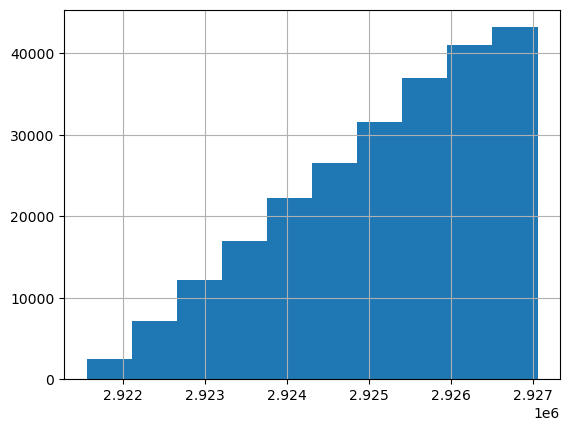

In [139]:
df.tenure_days.hist()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='tenure_days', ylabel='title_cnt'>

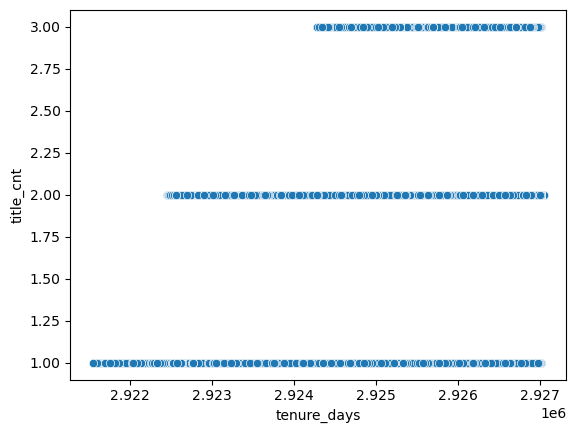

In [140]:
sns.scatterplot(data=df, x='tenure_days', y='title_cnt')

$H_o$: there is no linear relationship between number of titles and how long an employees has been there
    
$H_a$: there is linear relationship between number of titles and how long an employees has been there

alpha = 0.05

In [141]:
stats.spearmanr(df.tenure_days, df.title_cnt)

SignificanceResult(statistic=0.25489028077289544, pvalue=0.0)

In [142]:
stats.pearsonr(df.tenure_days, df.title_cnt)

PearsonRResult(statistic=0.2871267889704716, pvalue=0.0)

The p-value is less than alpha, so we reject the null hypothesis. 

There is a relationship between tenure and number of titles. 

#### Use the sleepstudy data.

In [143]:
df = data('sleepstudy')

In [144]:
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


#### Is there a relationship between days and reaction time?

In [145]:
df.Days.value_counts()

Days
0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: count, dtype: int64

<Axes: >

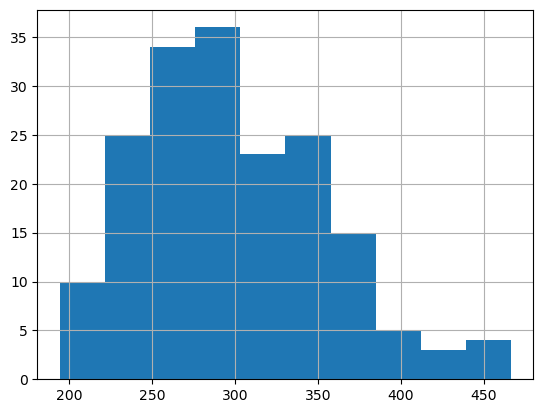

In [146]:
df.Reaction.hist()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


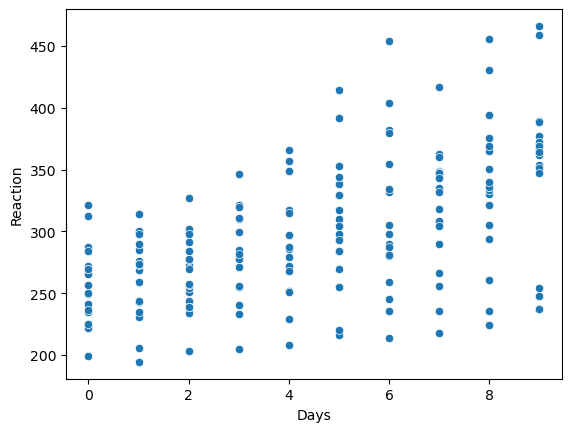

In [147]:
sns.scatterplot(data=df, x='Days', y='Reaction');

In [148]:
stats.spearmanr(df.Days, df.Reaction)

SignificanceResult(statistic=0.5228138502259547, pvalue=5.132878057706873e-14)

In [149]:
stats.pearsonr(df.Days, df.Reaction)

PearsonRResult(statistic=0.5352302262650255, pvalue=9.894096322214486e-15)

The p-value is less than alpha, so we reject the null hypothesis. 

There is a correlation between days and reaction time in the sleep study. 

# Comparison of means

(straight from notes)

Exercises

Continue working in your hypothesis_testing notebook.

Answer with the type of test you would use (assume normal distribution):

Is there a difference in grades of students on the second floor compared to grades of all students?

Questions about this:

What variable(s) am I testing?
 - grades of students
 
What type of variable is that? (datatype)
 - Continuous!
 
Is there a second variable I'm comparing grades to?
 - No, I'm just comparing grades on their face, but looking at two different slices of grades
 
Based on that much:

Am I doing a means test, a proportions test, or a correlation test?
 - means test: a single continuous variable across categories

Now that I know that I'm doing a means test:
 - One tailed/Two tailed, One sample/Two sample:
 
One sample or two sample?

 - One sample! Comparing grades of second floor students to all students (all students in this case represents our population)

One tail or two tailed?

 - Two tailed! We are just asking if the grades of second floor students are different, not that they are specifically higher or lower.

Are adults who drink milk taller than adults who don't drink milk?

In [151]:
# What variables?
# height ==> how tall the person is
# drink milk vs not drink milk ==> category that we are separating height by
#  A continuous var (height) across two categories (drink milk v not drink milk)
# 
# Based on that:
# means test! one continuous var (height)
# I know its going to be a t test:
# one/two tails? samples?
# Samples? ==> Two: drink milk vs not drink milk
# Tails? ==> One: two tailed would be asking if there was a difference, 
# but we are interested in looking specifically if one
# party is taller.

Is the price of gas higher in Texas or in New Mexico?

In [152]:
# Variable: gasoline price\
# Category across variable: State (Tx vs NM)
# single continuous variable across two categories: means test!
# T test stipulations:
# Tails?: One: price of gas specifically higher (not just different)
# Samples?: Two: Texas vs New Mexico specifically


Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [153]:
# Variable(s)? ==> stress level (continuous(?))
# Categories of stress: CAP, DS, WD
# What type of test?
# three categories, one continuous variable:
# technically a means test, but more specifically:
# Analysis of variance (ANOVA, (f-oneway))
# What if stress is a discrete variable?
# If it manifested as low, medium, high
# Then we are looking at three different categories:
# (low, medium, high) X (Cap, ds, wd)
# proportion test! χ^2 test!

In [154]:
# χ

In [155]:
# tabular data
import numpy as np
import pandas as pd
# stats from scipy
from scipy import stats
# matplotlib for visualizations
import matplotlib.pyplot as plt

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [156]:
# Looking at these two samples:
# 40 sales from office #1:
# distributed with a mean of 90 days and a std of 15 days
# 50 sales from office #2:
# distributed with a mean 100 days and a standard deviation of 20 days

In [157]:
# stats.ttest_ind_from_stats?

In [158]:
# simulations of the offices in two different ways:
# way 1: use numpy's normal random sample
office_1 = np.random.normal(90, 15, size=(40,))
office_2 = np.random.normal(100, 20, size=(50,))
# alternatively, another simulation method:
# using stats to simulate a normal dist and then take Random ValueS
office_1 = stats.norm(90,15)
office_2 = stats.norm(100,20)

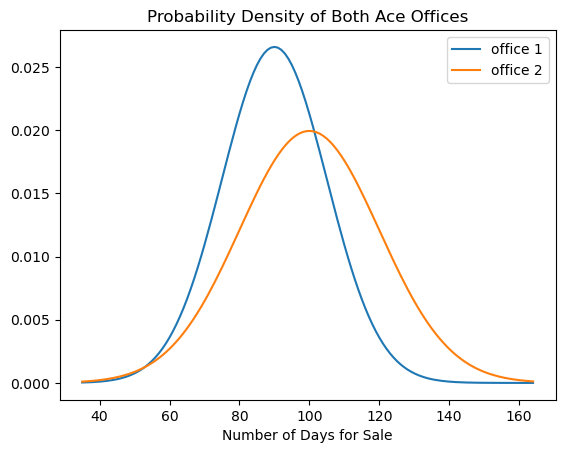

In [159]:
# a little bit of extra exploration:
x = np.arange(35, 165)
y1 = [office_1.pdf(n) for n in x]
y2 = [office_2.pdf(n) for n in x]
plt.plot(x, y1, label='office 1')
plt.plot(x, y2, label='office 2')
plt.legend()
plt.title('Probability Density of Both Ace Offices')
plt.xlabel('Number of Days for Sale')
plt.show()

In [160]:
# option 1:
# use the simulations that I just created
# option 2: use ttest_ind_from_stats

In [161]:
# option 1:
# lets take the two simulated versions
# Parameters:
# We know they are normal specifically because we defined them as so
# Do we know that they have equal variance?
# Well we know the stds are different,
# but lets see what a levene test says

In [162]:
# Levene Set-Up
# H0: The variance in office 1 sales is equivalent to office 2 sales
# H1: the variance in office 1 sales is different from office 2
# confidence level: standard, 95% ==? 0.95
#  ==> alpha: 0.05
lv_stat, p = stats.levene(office_1.rvs(40), office_2.rvs(50))
if p < 0.05:
    print('I can reject H0')
else:
    print('We fail to reject h0')

I can reject H0


In [163]:
# we fail to reject the null hypothesis, which means that
# we cannot assert that these have different variances
# which means that students ttest will do.

 - H$_0$ : There is no difference in the average sale time between office 1 and office 2
 - H$_a$ : There is a difference in the average sale time for office 1 to office 2

In [164]:
def test_hypothesis(p, 
                    stat, 
                    tails='two', 
                    direction='greater',
                    α=0.05):
    '''
    test_hypothesis will take in a p value and a test statistic
    if p is less than a presumed alpha, then we  will reject
    our null hypothesis
    
    this takes in two positional arguments,
    p stat, a float value representing the probability of serendipity
    stat, a float value representing the test statistic
    
    with the keyword arguments f tails, direction, and alpha,
    the operator is able to change the control structrure in order
    to perform a one-tailed ttest if so desired
    '''
    if tails == 'two':
        if p < α:
            print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
        else:
            print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
    else:
        if direction == 'greater':
            if ((p/2) < α) and (stat > 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
        else:
            if ((p/2) < α) and (stat < 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')

In [165]:
# alpha: 0.05
α = 0.05
t_stat, p = stats.ttest_ind(
    office_1.rvs(40),
    office_2.rvs(50),
    equal_var=True)

In [166]:
t_stat

-2.592160583483123

In [167]:
p

0.011166272160863185

In [168]:
test_hypothesis(p, t_stat)

We can reject our null hypothesis!.
 Our p-value is 0.011166272160863185 
 Our statistic value is -2.592160583483123


In [169]:
# stats.ttest_ind_from_stats?

In [170]:
# solve this the other way:
t_stat, p = stats.ttest_ind_from_stats(
    90,
    15,
    40,
    100,
    20,
    50
)

In [171]:
t_stat

-2.6252287036468456

In [172]:
p

0.01020985244923939

In [173]:
test_hypothesis(p, t_stat)

We can reject our null hypothesis!.
 Our p-value is 0.01020985244923939 
 Our statistic value is -2.6252287036468456


In [174]:
from pydataset import data

Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [175]:
mpg = data('mpg')

In [176]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [177]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [178]:
mpg.head(4)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact


In [179]:
# lets create a new column for fuel efficiency based on
# the average between city and highway mileage

In [180]:
# stats.hmean((mpg.cty, mpg.hwy))

In [181]:
# reassign mpg into a version of itself
# but this time with a new column called fuel_e
# that holds the harmonic mean between city and highway mileage
# huzzah!
mpg = mpg.assign(fuel_e = stats.hmean((mpg.cty, mpg.hwy)))

In [182]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  fuel_e        234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [183]:
# same flow chart from before:
# what variables am I examining?
# fuel efficiency! I just created it! Its continuous! Its one thing!
# Fuel efficiency across two categories, though!
# years of vehicles in 99 vs vehicles from '08

In [184]:
mpg.year.unique()

array([1999, 2008])

In [185]:
# If I want to proceed forward with testing here:
# mpg dataframe, where the mpg dataframe year is 1999 ==> specifically the fuel_e Series
# mpg dataframe where mpg dataframe year is 2008 ==> specifically the fuel_e Series

In [186]:
fuel_2008 = mpg[mpg.year == 2008].fuel_e
fuel_1999 = mpg[mpg.year == 1999].fuel_e

In [187]:
# to continue with means testing:
# normality
# variance
# independence

In [188]:
# normality? 
fuel_2008.shape

(117,)

In [189]:
fuel_1999.shape

(117,)

In [190]:
# so I have 117 samples for each, I'll toss that in with CLT assumtions
# but put a pin in it to revisit

In [191]:
# variance:
# lets run a levene test:
# H0: the variance is equivalent for 99 vehicles compared to 2008 vehicles
# Ha: the variance is different for 99 vehicles compared to 08 vehicles
lev_stat, p = stats.levene(fuel_1999, fuel_2008)
test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.8602339200830025.
 Our statistic is 0.031071867429515194


In [192]:
# independence? We know that there are no samples in this dataframe
# that are 2008 and 1999.  These are exclusive.
# 
# two tailed ==> we want to know if there is a difference in general
# two sampled ==> 1999 vs 2008, not one of those against all cars
# proceeding forward with our means test:
t_stat, p = stats.ttest_ind(fuel_1999,
                            fuel_2008,
                            equal_var=True)
test_hypothesis(p, t_stat)
    

We fail to reject the null hypothesis :(.
 Our p-value is 0.7635345888327115.
 Our statistic is 0.3011962975077886


Are compact cars more fuel-efficient than the average car?

In [193]:
# one sample or two sample?
# one sample: compact cars vs all cars
# one tail or two tailed?
# one tailed: *more* fuel efficient

In [194]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [195]:
# so lets proceed forward with a one-tailed one sample test!
# just the compact cars from mpg, specifically the fuel efficiency:
fuel_compact = mpg[mpg['class'] == 'compact'].fuel_e

In [196]:
# stats.ttest_1samp?

In [197]:
# calculate the population mean for fuel efficiency
μ = mpg.fuel_e.mean()

In [198]:
t_stat, p = stats.ttest_1samp(fuel_compact,
                              μ)

In [199]:
t_stat

7.512360093161361

In [200]:
p

1.5617666348807277e-09

 - H$_0$: The fuel efficiency of compact cars is the same or less than the fuel efficiency of cars overall
 - H$_a$: The fuel efficiency of compact cars is greater than the fuel efficiency of cars overall

In [201]:
test_hypothesis?

Signature: test_hypothesis(p, stat, tails='two', direction='greater', α=0.05)
Docstring:
test_hypothesis will take in a p value and a test statistic
if p is less than a presumed alpha, then we  will reject
our null hypothesis

this takes in two positional arguments,
p stat, a float value representing the probability of serendipity
stat, a float value representing the test statistic

with the keyword arguments f tails, direction, and alpha,
the operator is able to change the control structrure in order
to perform a one-tailed ttest if so desired
File:      /var/folders/52/7v1nmz_530l1j3l89ryvfhr80000gn/T/ipykernel_4760/2634129996.py
Type:      function

In [202]:
# I want to test that 
# the fuel efficiency of compact cars is greater,
# so my t_stat should be positive if I reject my H0
# and I want to check p/2 against alpha instead of just p.
# this is handled
# based on the way we defined test_hypothesis
# and the fact that we fed in our arguments
# as the sample we compared against
# the population, 
# which the alternative hypothesis was looking for a difference
# in the greater-than direction.
# the positive tail of the t-distribution)
test_hypothesis(p,
                t_stat,
                tails='one')

We can reject our null hypothesis!.
 Our p-value is 1.5617666348807277e-09 
 Our statistic value is 7.512360093161361


## Do manual cars get better gas mileage than automatic cars?

In [203]:
# pandas refresher:
# mpg dataframe
# mpg
# just the transmission series:
# mpg.trans
# the values inside of the trans column but lowercase:
# needs a .str to do a string method on the values in that series
# mpg.trans.str.lower() ==> note parens on lower because method
# the output of that method is still a series full of strings
mpg.trans.str.lower().head(5)

1      auto(l5)
2    manual(m5)
3    manual(m6)
4      auto(av)
5      auto(l5)
Name: trans, dtype: object

In [204]:
# my god, its full of strings
# take those lower case strings
# and just check to see if the first letter is 'a':
# this will return a boolean because its a logic check:
mpg.trans.str.lower().str.startswith('a')

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [205]:
# if I tossed values in there with a np.where, etc
# then I would be needing to do a mask that looked a little more
# like
# mpg[mpg.is_auto == 'auto']
# buuuuut:

In [206]:
# if I assign it as a bool directly:
mpg['is_auto'] = mpg.trans.str.lower().str.startswith('a')
# then I can use that info directly as a mask since it already renders
# as a boolean

In [207]:
manual_fe = mpg[~mpg.is_auto].fuel_e
auto_fe = mpg[mpg.is_auto].fuel_e

Set up our hypothesis test:
 - H$_0$: Manual vehicles get the same mileage as automatic vehicles or manual vehicles in fact get lower average mileage than automatic vehicles
 - H$_a$: Manual vehicles get a better average mileage than automatic vehicles

In [208]:
# parameters:
# enough samples ==> presume normality (shapiro if we are picky)\
# (if shapiro fails, do a mann-whitneyu test)
# assert equal variance:
# lets do a quick levene

In [209]:
# H0: auto and manual mpg have equal variance
# Ha: ato and manual mpg have inequal variance
lev_stat, p = stats.levene(manual_fe, auto_fe)
test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.9062462281015493.
 Our statistic is 0.013901207169738269


In [210]:
# lets do our means test
# one tailed!
# we want to check that manual cars may get better fuel efficience
# we want to check that manual vehicle mpg > auto vehicle mpg
# so we will feed them that order, and expect t_stat > 0 in order
# to reject the null hypothesis
# if man.mpg > auto.mpg ==> positive t_stat ==> reject null if p(/2) is also OK
t_stat, p = stats.ttest_ind(
    manual_fe,
    auto_fe,
    equal_var=True)
test_hypothesis(p,
                t_stat,
                tails='one',
               α=0.05)
            

We can reject our null hypothesis!.
 Our p-value is 5.510464610044009e-06 
 Our statistic value is 4.652577547151351
